# Penguins Dataset Simple Linear Regression - Fitting Non-Linear Feature Predictions

### [Penguins Dataset](https://seaborn.pydata.org/tutorial/introduction.html)

Author: [Kevin Thomas](mailto:ket189@pitt.edu)

## Citation

[1] Allison Horst, https://github.com/allisonhorst/palmerpenguins

## Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf

## Load Dataset

In [2]:
df = sns.load_dataset('penguins')

## Perform Essential Exploration & Data Cleaning

### Display the initial number of rows and columns.

In [3]:
df.shape

(344, 7)

### Display the initial variable names and their associated data types.

In [4]:
df.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

### Display the number of missing values for each column, remove the missing values and create a clean copy of the dataset.

In [5]:
df.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [6]:
df_clean = df.dropna().copy()

In [7]:
df_clean.isna().sum()

species              0
island               0
bill_length_mm       0
bill_depth_mm        0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

### Display the number of unique values for each column after removing missing data and before initial exploration.

In [8]:
df_clean.nunique()

species                3
island                 3
bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
sex                    2
dtype: int64

### Display the number of unique values for the categorical variables after removing missing data and before initial exploration.

In [9]:
df_clean.select_dtypes(exclude='number').nunique()

species    3
island     3
sex        2
dtype: int64

### Display the number of unique values for the continuous variables after removing missing data and before initial exploration.

In [10]:
df_clean.select_dtypes(include='number').nunique()

bill_length_mm       163
bill_depth_mm         79
flipper_length_mm     54
body_mass_g           93
dtype: int64

## Data Standardization

### Examine raw numeric features magnitude and scale.

The actual values in the boxplot represent the distributions of the penguin dataset’s numeric features: bill length (mm), bill depth (mm), flipper length (mm), and body mass (g). The plot shows that body mass is on a much larger scale than the other features, indicating that its values are much higher (in grams) compared to the millimeter measurements of the other features, which is important for understanding feature scaling and the need for standardization in data analysis.

In [11]:
df_clean.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,333.000000,333.000000,333.000000,333.000000
mean,43.992793,17.164865,200.966967,4207.057057
std,5.468668,1.969235,14.015765,805.215802
min,32.100000,13.100000,172.000000,2700.000000
25%,39.500000,15.600000,190.000000,3550.000000
50%,44.500000,17.300000,197.000000,4050.000000
75%,48.600000,18.700000,213.000000,4775.000000
max,59.600000,21.500000,231.000000,6300.000000


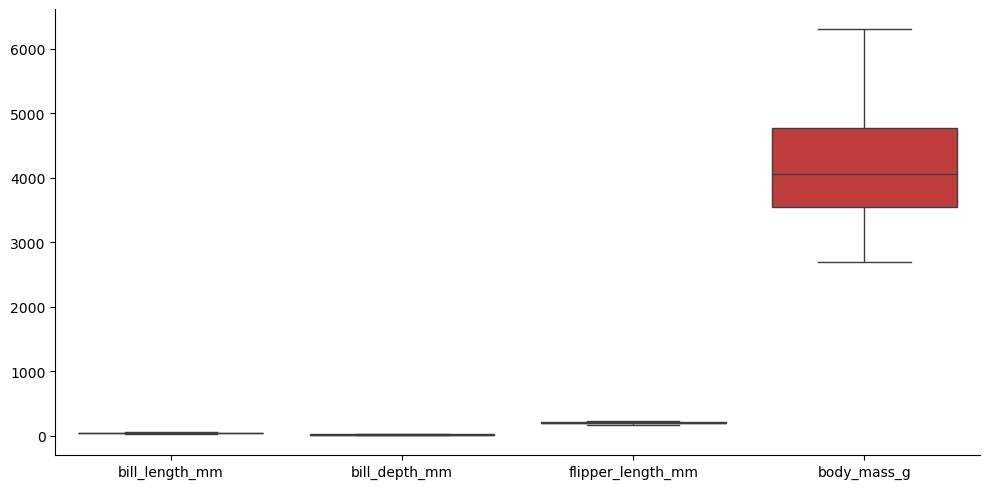

In [12]:
sns.catplot(data=df_clean, 
            kind='box', 
            aspect=2)
plt.show()

### Prepare the dataset by extracting our numeric features.

In [13]:
df_clean_features = df_clean.select_dtypes('number').copy()

### Standardize the numeric features.

In [14]:
X = StandardScaler().fit_transform(df_clean_features)

### Examine standarized numeric features magnitude and scale.

After standardization, all numeric features (bill length, bill depth, flipper length, and body mass) have similar distributions centered around zero with comparable spread, indicating that differences in scale have been removed and the features are now suitable for clustering and other analyses that assume equal variance.

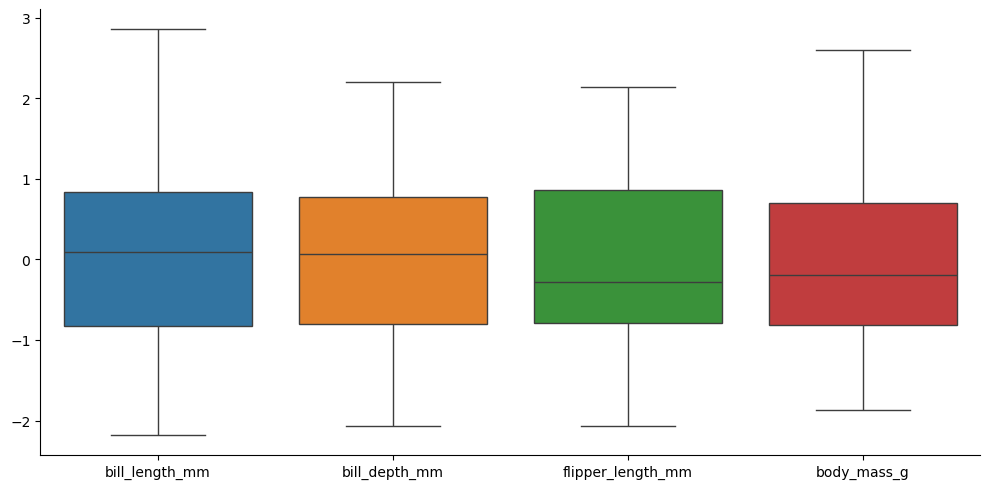

In [15]:
sns.catplot(data=pd.DataFrame(X, 
                              columns=df_clean_features.columns), 
                              kind='box', 
                              aspect=2)
plt.show()

## Simple Linear Regression - Fitting a Non-Linear Feature

### We will fit a linear model between the input `flipper_length_mm` and the output `body_mass_g` assuming a non-linear relationship between the trend and the input.

$\mu = \beta_0 + \beta_1 x + \beta_2 x^2$

$\mu$ predicted trend

$\beta_0$ intercept: value of $\mu$ when $x = 0$

$\beta_1$ linear effect: change in $\mu$ for a one-unit increase in $x$

$\beta_2$ quadratic effect: change in $\mu$ for a one-unit increase in $x^2$

$x$ feature or input variable: independent variable used to predict $\mu$

In [16]:
lm_fit = smf.ols(formula='body_mass_g ~ flipper_length_mm + I(flipper_length_mm ** 2)', 
                 data=df_clean). \
                 fit()

In [17]:
lm_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            body_mass_g   R-squared:                       0.778
Model:                            OLS   Adj. R-squared:                  0.777
Method:                 Least Squares   F-statistic:                     578.5
Date:                Tue, 26 Aug 2025   Prob (F-statistic):          1.34e-108
Time:                        19:56:33   Log-Likelihood:                -2449.5
No. Observations:                 333   AIC:                             4905.
Df Residuals:                     330   BIC:                             4916.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
=============================================================================================
                                coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept                  1.658e+04   4616.247      3.592      0.000    7498.887    2.57e+04
flipper_length_mm          -171.6140     45.524     -3.770      0.000    -261.169     -82.059
I(flipper_length_mm ** 2)     0.5449      0.112      4.874      0.000       0.325       0.765
==============================================================================
Omnibus:                       10.746   Durbin-Watson:                   2.214
Prob(Omnibus):                  0.005   Jarque-Bera (JB):               10.985
Skew:                           0.441   Prob(JB):                      0.00412
Kurtosis:                       3.119   Cond. No.                     9.07e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 9.07e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### The `.params` attribute stores the coefficient estimates as they minimize the sum of squared errors.

* The intercept is 16,579.87, which represents the baseline predicted body mass when both flipper length and its square are zero.

* The coefficient for `flipper_length_mm` is -171.61, indicating that for every additional millimeter in flipper length, body mass decreases by about 171.61 grams, before considering the quadratic effect.

* The coefficient for the squared term, `I(flipper_length_mm ** 2)`, is 0.54, meaning that for every unit increase in the square of flipper length, body mass increases by 0.54 grams, introducing an upward-curving effect.

* The presence of the positive squared term (0.54) shows that the relationship between flipper length and body mass is quadratic and curves upward, rather than being strictly linear.

In [18]:
lm_fit.params

Intercept                    16579.869215
flipper_length_mm             -171.613976
I(flipper_length_mm ** 2)        0.544948
dtype: float64

### The standard error on the estimate is contained in the `.bse` attribute.

* The standard error for the intercept is 4,616.25, indicating the level of uncertainty in estimating the baseline predicted body mass.

* The standard error for the `flipper_length_mm` coefficient is 45.52, quantifying the variability in the estimate of the linear effect of flipper length on body mass.

* The standard error for the squared term, `I(flipper_length_mm ** 2)`, is 0.11, reflecting the precision of the estimate for the quadratic effect.

In [19]:
lm_fit.bse

Intercept                    4616.246647
flipper_length_mm              45.524470
I(flipper_length_mm ** 2)       0.111807
dtype: float64

### We can use the $\pm1$ and $\pm2$ standard error intervals to know how trustworthy the estimate is.

* We are 95% confident that the intercept is somewhere between 7,498.89 and 25,660.85 grams.

* We are 95% confident that the coefficient for `flipper_length_mm` is somewhere between –261.17 and –82.06 grams per millimeter.

* We are 95% confident that the coefficient for the quadratic term `(I(flipper_length_mm ** 2))` is somewhere between 0.33 and 0.76.

* These are exact confidence intervals calculated by `.conf_int()` rather than approximate intervals based on standard errors.

In [20]:
lm_fit.params - 2 * lm_fit.bse

Intercept                    7347.375921
flipper_length_mm            -262.662917
I(flipper_length_mm ** 2)       0.321333
dtype: float64

In [21]:
lm_fit.params + 2 * lm_fit.bse

Intercept                    25812.362509
flipper_length_mm              -80.565036
I(flipper_length_mm ** 2)        0.768562
dtype: float64

In [22]:
lm_fit.conf_int(). \
       rename(columns={0: 'ci_lwr',
                       1: 'ci_upr'})

,ci_lwr,ci_upr
Intercept,7498.887253,25660.851176
flipper_length_mm,-261.168743,-82.059210
I(flipper_length_mm ** 2),0.325003,0.764892


### The P-values for the coefficients are used to identify the **statistically significant** of the input.

* A **statistically significent** input one that has a **p-value** less than 0.05 which means if this is the case, we have a **statistically significient** input or feature.

* These values are extremely small and much lower than 0.05 so they indicate very strong **statistical significance** for both parameters. 

In [23]:
lm_fit.pvalues

Intercept                    0.000379
flipper_length_mm            0.000194
I(flipper_length_mm ** 2)    0.000002
dtype: float64

In [24]:
lm_fit.pvalues < 0.05

Intercept                    True
flipper_length_mm            True
I(flipper_length_mm ** 2)    True
dtype: bool

### Visualize the coefficient estimates as markers in a scatter plot and the confidence intervals as error bars. 

* We are confident that the 95% confidence interval does NOT contain zero as both `flipper_length_mm` and the **intercept** are not touching the zero grey dotted line.

* The **intercept** is **statistically significantly negative**; the **slope** is negative, and the `flipper_length_mm` is **statistically significantly positive**; the **slope** is positive.

* **We are confident the slope is positive for the `flipper_length_mm`, therefore we are confident that the average output is increasing as the input or feature is increasing.**

In [25]:
def my_coefplot(
    model,
    var,
    xerr_mult=2,
    color='k',
    ecolor='k',
    elinewidth=2,
    ms=10,
    vline=0,
    xlabel='coefficient value',
    title=None,
    figsize=(7, 2.5),
    xlim=None):
    """
    Plots a single coefficient with error bars from a statsmodels model.

    Params:
        model: fitted statsmodels model
        var: variable name (str), e.g. 'Intercept' or 'I(flipper_length_mm ** 2)'
        xerr_mult: multiplier for error bars (default 2)
        color: marker color
        ecolor: error bar color
        elinewidth: error bar line width
        ms: marker size
        vline: where to draw the vertical reference line (default 0)
        xlabel: x-axis label (default 'coefficient value')
        title: figure title (default None, uses variable name)
        figsize: tuple, figure size
        xlim: tuple, x-axis limits (optional, auto if None)
    """
    # Get coefficient and error values
    coef = model.params[var]
    err = xerr_mult * model.bse[var]

    # Create the plot
    _, ax = plt.subplots(figsize=figsize)
    ax.errorbar(
        y = [var],
        x = [coef],
        xerr = [err],
        fmt='o',
        color=color,
        ecolor=ecolor,
        elinewidth=elinewidth,
        ms=ms
    )

    # Add vertical line for reference
    ax.axvline(x=vline, 
               linestyle='--', 
               linewidth=4, 
               color='grey')
    ax.set_xlabel(xlabel)
    if title is None:
        title = f"Coefficient Plot for '{var}'"
    ax.set_title(title)

    # Always include zero in xlim, and add padding around error bar
    bar_left = min(coef - err, vline)
    bar_right = max(coef + err, vline)
    pad = (bar_right - bar_left) * 0.15 if (bar_right - bar_left) > 0 else 1
    auto_xlim = (bar_left - pad, bar_right + pad)

    # Set x-axis limits
    if xlim is not None:
        ax.set_xlim(*xlim)
    else:
        ax.set_xlim(*auto_xlim)

    # Show the plot
    plt.show()

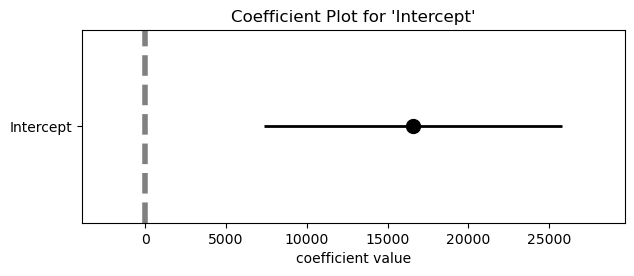

In [26]:
my_coefplot(lm_fit, var='Intercept')

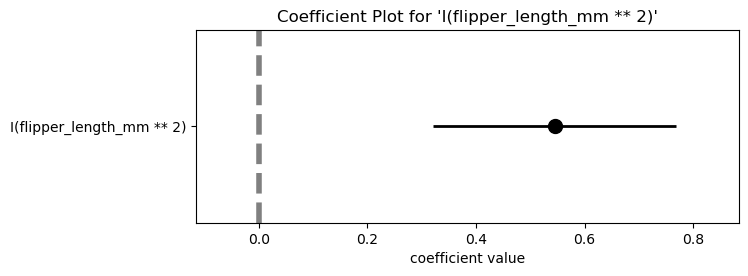

In [27]:
my_coefplot(lm_fit, var='I(flipper_length_mm ** 2)')

## Simple Linear Regression - Non-Linear Feature Prediction

In [28]:
x = df_clean['flipper_length_mm']
y = df_clean['body_mass_g']

In [29]:
my_quadratic, my_slope, my_intercept = np.polyfit(x, 
                                                  y, 
                                                  2)

In [30]:
df_viz = df_clean.copy()

In [31]:
df_viz['trend'] = my_intercept + \
                  my_slope * df_viz['flipper_length_mm'] + \
                  my_quadratic * df_viz['flipper_length_mm'] \
                  **2

### Include the training set as a scatter plot.

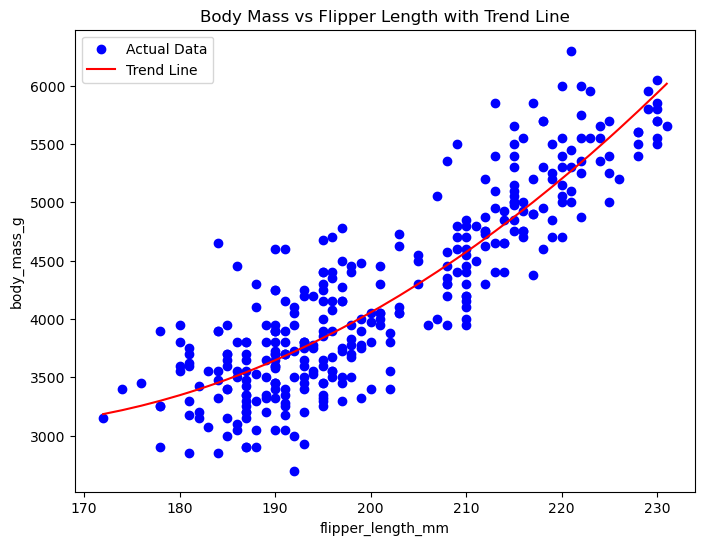

In [32]:
sorted_df = df_viz.sort_values('flipper_length_mm')
plt.figure(figsize=(8,6))
plt.scatter(df_viz['flipper_length_mm'], 
            df_viz['body_mass_g'], 
            color='blue', 
            label='Actual Data')
plt.plot(sorted_df['flipper_length_mm'], 
         sorted_df['trend'], 
         color='red', 
         label='Trend Line')
plt.xlabel('flipper_length_mm')
plt.ylabel('body_mass_g')
plt.title('Body Mass vs Flipper Length with Trend Line')
plt.legend()
plt.show()

### We will not know the true relationship therefore we must include the confidence intervals on the predicted trend as we must always represent the uncertainty on the trend given the fitted data.

In [33]:
predictions = lm_fit.get_prediction(df_viz)

In [34]:
lm_pred_summary = predictions.summary_frame()

In [35]:
lm_pred_summary

,mean,mean_se,mean_ci_lower,mean_ci_upper,obs_ci_lower,obs_ci_upper
0,3370.773580,49.673534,3273.056864,3468.490297,2615.946156,4125.601005
1,3512.682868,32.638135,3448.477825,3576.887911,2761.458420,4263.907316
2,3836.783006,26.945004,3783.777368,3889.788644,3086.432766,4587.133245
3,3757.131484,26.122145,3705.744557,3808.518411,3006.893855,4507.369113
4,3645.828418,26.589245,3593.522623,3698.134213,2895.527292,4396.129544
...,...,...,...,...,...,...
328,4810.906624,30.268285,4751.363500,4870.449749,4060.066250,5561.746999
329,4873.075244,30.527844,4813.021521,4933.128967,4122.194206,5623.956282
330,5338.772657,40.807527,5258.496960,5419.048355,4586.004385,6091.540929
331,4689.839072,30.240975,4630.349671,4749.328472,3939.002956,5440.675187


### Visualize the 95% confidence interval and 95% prediction interval.

* **Confidence Interval (CI) for the Mean Prediction (Grey Band):**
  * Shows uncertainty in the estimate of the average value (the regression line) for a given x.
  * Typically narrow; with enough data, the mean can be estimated precisely.
  * 95% CI means: "We are 95% confident the true average response falls within this band for each x-value."
  * Most data points will not fall inside this band; it is only about the mean.

* **Prediction Interval (PI) for Individual Observations (Orange Band):**
  * Shows where we expect 95% of future individual data points to fall, at each value of x.
  * Much wider than the CI, because it includes both the uncertainty in the mean and the natural scatter (variance) of the data.
  * 95% PI means: "If we observe a new data point at a given x, there is a 95% chance it will fall inside this band."

* **Key Differences:**
  * CI is about the uncertainty in the average (regression line).
  * PI is about the uncertainty in predicting a single new data point.

* **In the plot:**
  * The grey band is the 95% CI for the mean prediction.
  * The orange band is the 95% PI for individual body mass measurements given flipper length.
  * The black dots are your actual data points.

* Most dots fall inside the orange PI band (as expected), but only a few will fall inside the narrow grey CI band.

* Use the PI to show the expected spread of new data.
  
* Use the CI to show uncertainty in the estimated average.

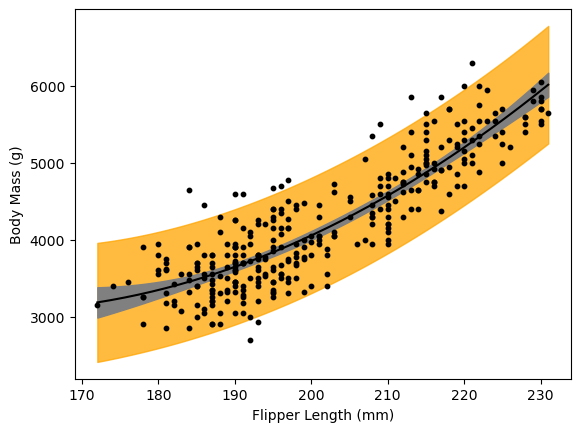

In [36]:
# Generate x values over the full data range
flipper_range = np.linspace(df_clean.flipper_length_mm.min(), 
                            df_clean.flipper_length_mm.max(), 
                            200)
df_pred = pd.DataFrame({'flipper_length_mm': flipper_range})
lm_pred_summary_full = lm_fit.get_prediction(df_pred).summary_frame()

# Create the figure and axis
fig, ax = plt.subplots()

# Prediction interval - the uncertainty on a single measurement (observation)
ax.fill_between(flipper_range,
                lm_pred_summary_full.obs_ci_lower, 
                lm_pred_summary_full.obs_ci_upper,
                facecolor='orange', 
                alpha=0.75, 
                edgecolor='orange')

# Confidence interval - the uncertainty on the mean output
ax.fill_between(flipper_range,
                lm_pred_summary_full.mean_ci_lower, 
                lm_pred_summary_full.mean_ci_upper,
                facecolor='grey', 
                edgecolor='grey')

# Output mean - the predictive trend - the best fit line
ax.plot(flipper_range, 
        lm_pred_summary_full['mean'], 
        color='k', 
        linewidth=1.5)

# Include the training data
ax.scatter(df_clean.flipper_length_mm, 
           df_clean.body_mass_g, 
           color='k', 
           s=10)

# Set the labels
ax.set_xlabel('Flipper Length (mm)')
ax.set_ylabel('Body Mass (g)')

# Show the plot
plt.show()